<a href="https://colab.research.google.com/github/ZoubirCHATTI/08_Machin_Learning/blob/main/03_MNIST_images_classification/02_MNIST_CNN_Functional_API.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#Importing necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Conv2D, Dense, Flatten, MaxPooling2D, Input
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping

In [3]:
#Loading data
(train_data, train_labels), (test_data, test_labels) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [4]:
print(f"train_data shape:", train_data.shape)
print(f"train_labels shape:", train_labels.shape)
print(f"test_data shape:", test_data.shape)
print(f"test_labels shape:", test_labels.shape)

train_data shape: (60000, 28, 28)
train_labels shape: (60000,)
test_data shape: (10000, 28, 28)
test_labels shape: (10000,)


In [5]:
#Defining a function that binarizes the output labels
def to_one_hot (sequence, dimension):
  res=np.zeros((len(sequence), dimension))
  for i , seq in enumerate(sequence):
    res[i , seq]=1
  return res

In [6]:
#Reshaping the data
X_train=train_data.reshape(-1, 28,28,1)
X_test=test_data.reshape(-1, 28,28,1)

In [7]:
#Normalization of pixel intensities
X_train=X_train/X_train.max()
X_test=X_test/X_test.max()

In [8]:
#Vectorizing labels
Y_train=to_one_hot(train_labels, 10)
Y_test=to_one_hot(test_labels, 10)

In [10]:
#Functional API model mounting
inputs=Input(shape=(28 , 28 , 1))
x= Conv2D(32, kernel_size=3, activation='relu')(inputs)
x=MaxPooling2D(pool_size=2)(x)
x=Conv2D(64, kernel_size=3, activation='relu')(x)
x=MaxPooling2D(pool_size=2)(x)
x=Conv2D(128, kernel_size=3, activation='relu')(x)
x=Flatten()(x)
x=Dense(100, activation='relu')(x)
output=Dense(10, activation='softmax')(x)
model=Model(inputs=inputs, outputs=output)


In [11]:
#Model compilation
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

#Stopping condition
early_stopping=EarlyStopping(monitor='val_loss', patience=2)

In [12]:
#Model training
hitory=model.fit(X_train, Y_train, batch_size=236, epochs=20, callbacks=[early_stopping], validation_split=.2)

Epoch 1/20
204/204 ━━━━━━━━━━━━━━━━━━━━ 40s 190ms/step - accuracy: 0.5746 - loss: 0.2296 - val_accuracy: 0.9496 - val_loss: 0.0344
Epoch 2/20
204/204 ━━━━━━━━━━━━━━━━━━━━ 41s 191ms/step - accuracy: 0.9558 - loss: 0.0311 - val_accuracy: 0.9736 - val_loss: 0.0181
Epoch 3/20
204/204 ━━━━━━━━━━━━━━━━━━━━ 40s 187ms/step - accuracy: 0.9786 - loss: 0.0152 - val_accuracy: 0.9778 - val_loss: 0.0161
Epoch 4/20
204/204 ━━━━━━━━━━━━━━━━━━━━ 39s 190ms/step - accuracy: 0.9854 - loss: 0.0105 - val_accuracy: 0.9872 - val_loss: 0.0102
Epoch 5/20
204/204 ━━━━━━━━━━━━━━━━━━━━ 39s 189ms/step - accuracy: 0.9892 - loss: 0.0079 - val_accuracy: 0.9877 - val_loss: 0.0100
Epoch 6/20
204/204 ━━━━━━━━━━━━━━━━━━━━ 41s 191ms/step - accuracy: 0.9913 - loss: 0.0065 - val_accuracy: 0.9832 - val_loss: 0.0131
Epoch 7/20
204/204 ━━━━━━━━━━━━━━━━━━━━ 42s 194ms/step - accuracy: 0.9932 - loss: 0.0054 - val_accuracy: 0.9889 - val_loss: 0.0084
Epoch 8/20
204/204 ━━━━━━━━━━━━━━━━━━━━ 40s 189ms/step - accuracy: 0.9939 - loss: 0

In [13]:
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 28, 28, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 3, 3, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 1152)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 100)            │       115,300 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 417,966 (1.59 MB)

 Trainable params: 208,982 (816.34 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 208,984 (816.35 KB)

In [20]:
#Functional API model evaluation
loss, accuracy=model.evaluate(X_test, Y_test, verbose=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.9890 - loss: 0.0078


In [15]:
history_dict=hitory.history
loss=history_dict['loss']
val_loss=history_dict['val_loss']
acc=history_dict['accuracy']
val_acc=history_dict['val_accuracy']
epochs=range(1, len(loss)+1)

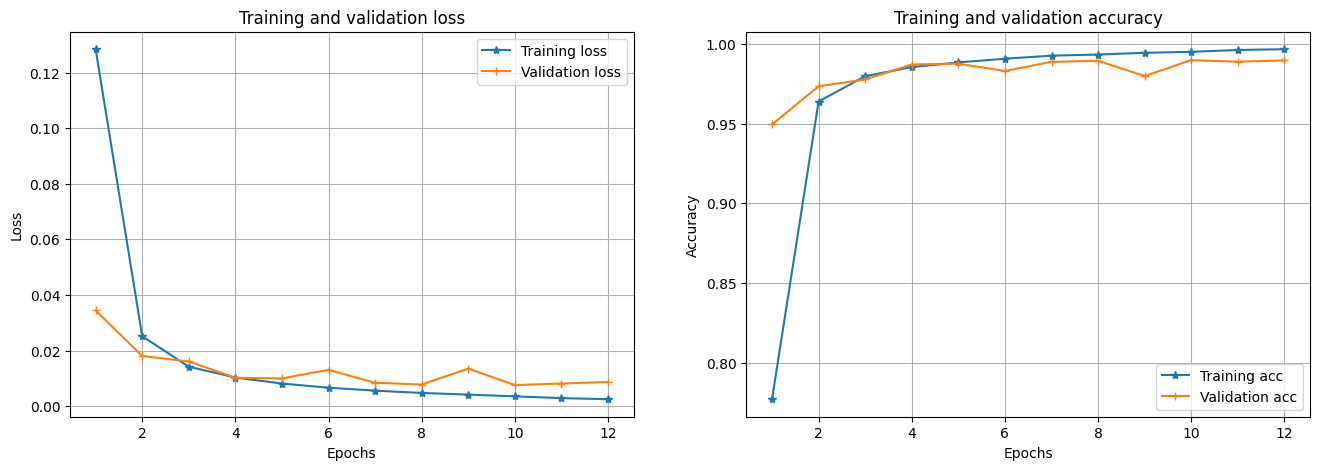

In [16]:
#Displaying different evalyation parameters against epochs
plt.figure(figsize=(16, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs, loss, marker='*', label='Training loss')
plt.plot(epochs, val_loss, marker='+', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.grid(True)
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(epochs, acc, marker='*', label='Training acc')
plt.plot(epochs, val_acc, marker='+', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend()
plt.show()